Use other columns to predict where city the pumpkin is.

In [13]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

pumpkins = pd.read_csv('../data/US-pumpkins.csv')

new_columns = ['Color', 'Origin', 'Item Size',
               'Variety',  'Package', 'City Name']

new_pumpkins = pumpkins.drop(
    [c for c in pumpkins.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)


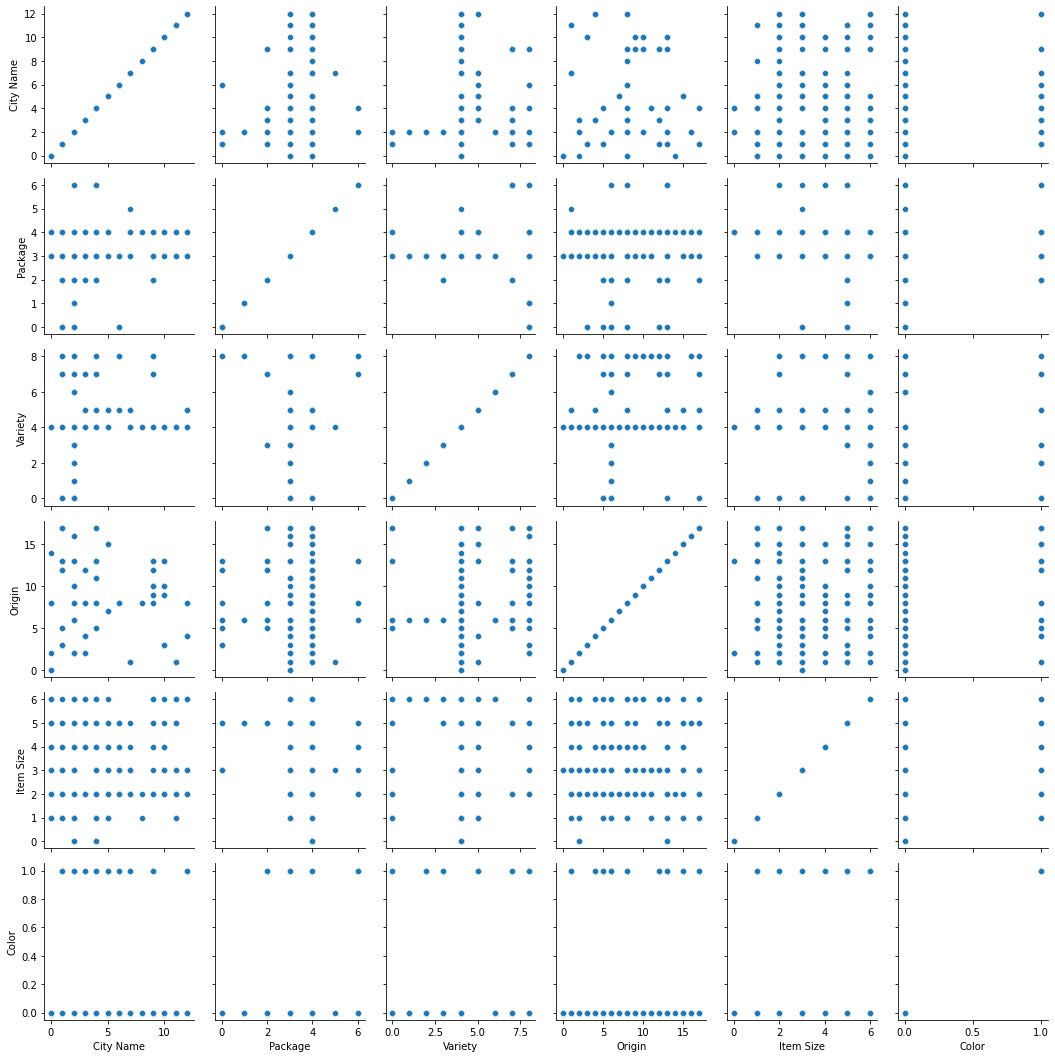

In [14]:
import seaborn as sns

g = sns.PairGrid(new_pumpkins)

g.map(sns.scatterplot)

In [17]:
from sklearn.model_selection import train_test_split

Selected_features = ['Origin','Item Size','Variety','Color','Package']

X = new_pumpkins[Selected_features]
y = new_pumpkins['City Name']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.44      0.57      0.50         7
           2       0.56      0.93      0.70        40
           3       0.00      0.00      0.00         7
           4       0.52      0.69      0.59        16
           5       0.50      0.25      0.33         4
           6       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         9

    accuracy                           0.53       100
   macro avg       0.17      0.20      0.18       100
weighted avg       0.36      0.53      0.42       100

Predicted labels:  [ 4  4  1  2  2  2  2  1  4  2  2  2  4  1  4  4  2  2  2  2  1  2  1  1
  2  2  2  2  4  2  4  2  5  2  2  2  2  

/Users/chuisi/.pyenv/versions/3.8.2/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chuisi/.pyenv/versions/3.8.2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chuisi/.pyenv/versions/3.8.2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: 

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  4,  2,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 37,  0,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  4,  0, 11,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  3,  0,  4,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0]])